In [1]:
import chit

%load_ext autoreload
%autoreload 2

In [2]:
chat = chit.Chat.clone("foo2.json")
chat.model = "openrouter/openai/gpt-4o-mini"

In [3]:
chat.log("tree")

[S_]dfac3dae──[U*]203da29b──[A_]dab57316── (master)
            │             ├─[A_]2ad8645b── (retry_response)
            │             └─ (new_branch*)
            └─[U_]ecf21cad──[A_]af5de4e2──[U_]1aeaedd1──[A_]afacbdeb──[U_]f05b7bd4──[A_]8ee7390f── (edit_prompt)


In [4]:
import ast
import operator


def math_eval(expr: str) -> str | float:
    """
    Evaluate a simple mathematical expression. The supported operators are * (multiply), - (subtract),
    + (add), / (divide), and ** (power). If your expression was unable to be evaluated,
    the output will instead be "Invalid expression".

    Parameters
    ----------
    expr : str
        the expression to evaluate

    Returns
    -------
    float
        the result of the evaluation, or str "Invalid expression" if the expression is invalid
    """
    operators = {
        ast.Add: operator.add,
        ast.Sub: operator.sub,
        ast.Mult: operator.mul,
        ast.Div: operator.truediv,
        ast.USub: operator.neg,
        ast.Pow: operator.pow
    }
    def eval_node(node):
        if isinstance(node, ast.BinOp):
            if type(node.op) in operators:
                left = eval_node(node.left)
                right = eval_node(node.right)
                return operators[type(node.op)](left, right)
            else:
                raise ValueError(f"Unsupported operation {node.op}")
        elif isinstance(node, ast.Constant):
            return node.value
        else:
            raise ValueError(f"Unsupported type {type(node)}")

    try:
        # Parse the expression into an AST
        node = ast.parse(expr, mode='eval').body
        return str(eval_node(node))
    except Exception as e:
        return f"ERROR: {type(e)}"

In [5]:
chat.tools = [math_eval]
chat._recalc_tools()

In [6]:
chat.checkout(branch_name="edit_prompt")
chat.commit("Now I have given you the ability to evaluate simple mathematical expressions. Try it out!")
chat.commit()

Sure! Please provide a mathematical expression you'd like me to evaluate, and I'll calculate it for you.


In [7]:
chat.commit("Think of any random numbers and add them using the math_eval tool I gave you.")

In [8]:
chat.commit()


1 tool calls pending; use .commit() to call one-by-one


In [9]:
chat.commit("Huh, see if you have access to math_eval now? Just add 547 and 623 and get back to me.")

In [10]:
chat.commit()

None


In [11]:
chat.commit("Hello? say something")
chat.commit()

None


In [12]:
chat.commit("Hello?!")
chat.commit(enable_tools=False)

[{'role': 'system', 'content': 'You are a helpful assistant.'},
 {'role': 'user', 'content': 'Solve the Riemann hypothesis.'},
 {'role': 'assistant',
  'content': "The Riemann Hypothesis is one of the most famous unsolved problems in mathematics, proposed by Bernhard Riemann in 1859. It is a conjecture about the non-trivial zeros of the Riemann zeta function, which is a complex function defined for complex numbers \\( s \\) where \\( \\text{Re}(s) > 1 \\) by the infinite series:\n\n\\[\n\\zeta(s) = \\sum_{n=1}^\\infty \\frac{1}{n^s}\n\\]\n\nThe Riemann zeta function can be analytically continued to a meromorphic function on the entire complex plane, except for a simple pole at \\( s = 1 \\).\n\n### The Riemann Hypothesis states:\nAll non-trivial zeros of the Riemann zeta function have real part equal to \\( \\frac{1}{2} \\). In other words, if \\( \\zeta(s) = 0 \\) and \\( s \\) is not a trivial zero (which occur at the negative even integers), then \\( \\text{Re}(s) = \\frac{1}{2} \\)
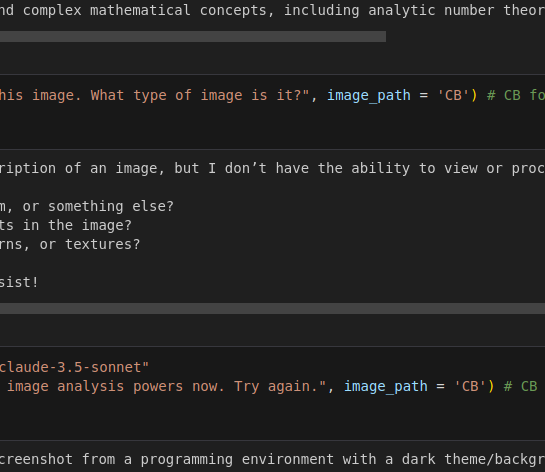
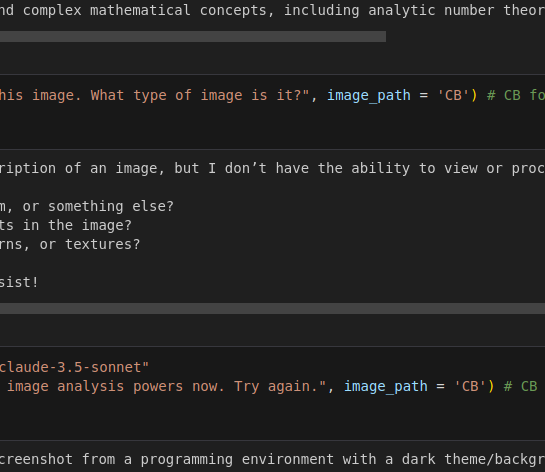

In [13]:
chat._get_message_history()